## Notes about this template

1. This Jupyter Notebook is a template that must be used for A/B test report, as it is aligned with the grading criteria. Not following this template may have an impact on the grade. Please follow all the instructions included here. 
2. The appendix with the answers to the Data Ethics Decision Aid is to be handed in on a separate Canvas assignment, and in Word or PDF (not Jupyter notebook). See instructions on Canvas.

# Title of the Assignment

* Student Name: Xinxu Li
* Student Number: 14686635
* Date: 23/03/2025
* Wordcount per section:
  * Introduction and Theoretical Justification： 300
  * Gathering data:218
  * Data Exploration & Evaluation:362
  * Evaluation:331
  * Limitations and Next Steps: 243
  * Ethical and Normative Considerations: 190

## Introduction and Theoretical Justification

Doing data analysis is not just about crunching the numbers, but also explaining what is being done, and why. Moreover, it is important to document your steps in a way that other analysts (or even yourself) can understand what was done, with what type of data, and based on what assumptions.

This section briefly introduces the organization, the communication challenge and proposes a general RQ so that the reader has enough context to understand the actual analysis being done in the notebook. This section also provides theoretical justification leading up to one hypothesis that will be tested in the A/B test.



____________________________________________________________________________________________________________________________________________________________________________________________________

The organization I choose is Arsenal, a globally renowned football club in London with 43 million fans. The analysis object is r/ArsenalFC on Reddit, a fan-run online forum with 138.8k+ followers.

According to Kick It Out (n.d.), discrimination, particularly racism, is severe both offline and online. Racism increased by 47% across football in the 2023-2024 season, despite campaigns like #NoRoomForRacism. Arsenal faces similar issues, with racist comments still appearing on social media. The challenge is to understand fans' views on racism in these online communities to improve Arsenal's communication.

This data analysis has two goals: to analyze Arsenal fans' emotional responses to racism and to help the club develop a better communication strategy. The aim is to create a more positive forum atmosphere, making fans feel inclusive and improving the club's image, potentially boosting profits and changing prejudices.

To achieve this, an A/B test will compare reactions to two communication plans: one based on statistics (e.g., reports of racism incidents) and the other on emotional stories (e.g., personal experiences). I will use Jupyter and Natural Language Processing (NLP) to analyze data from Reddit API, with SentimentIntensityAnalyzer() to gauge emotions in Reddit comments.

The research question of my A/B test: Can emotion-driven communication plan influence the r/ArsenalFC users' opinions on racism more than the statistics-driven plan?

The hypothesis of my A/B test: Emotion-driven (version_B) can influence the r/ArsenalFC users' opinions on racism more than statistics-driven group (v_A).

H1: Emotion-driven (B group) communication plan can let the users spend more visit time on them.

H2: Emotion-driven (B group) communication plan can let the users spend more user total unique page views on them.

H3：Emotion-driven (B group) communication plan can let users with elder age be engaged in the process.

The independent variables: ABtest. A test: only statistical numbers and objective reports; B test: real story, focusing on the victims of racisit and present it with a storyline

The dependent variables: referral, visit_len, user_age, user_country_of_origin, user_totalUniquePageviews.

Word Count:300

## Gathering Data

In the cells below you should load the dataset(s) into pandas to begin the data understanding and preparation. It is important to provide the reader with sufficient information to understand how the data were collected, and what the dataset is about. 

More specifically, you should answer at least adress the following topics in this section:
* What is the dataset about? How does it relate to the business challenge?
* What is the source of the data? 
    * You can for example think of Google Analytics or data collected through social media (when e.g., tracking effectiveness of campaigns)
* How were the data collected? What type of data collection (and/or sampling) strategy was used, and why? 
* What are the potential biases that could be introduced in the dataset because of the data collection method?
* How was privacy taken in consideration during data collection? What are some of the risks and/or privacy trade-offs that should be considered?

As a tip: use a meaningful name for your dataset(s) when loading them into a Pandas dataframe. Calling them just *df* or *data* will become confusing later on.

**IMPORTANT:** As part of open science and replicability, it is important to indicate also to the reader where the data is stored or located. In the case of the report, we expect you to upload the dataset to our SurfDrive folder, so we can download the data and replicate your results.


Before answering the questions, I will firstly import the data into my Jupyter.

In [54]:
import pandas as pd
import numpy as np

In [55]:
import pandas as pd

file_path = r"C:\Users\Xinxu\Desktop\Graded challenge 2\Li_Xinxu_s_metrics.csv.gz"
df_metrics_csv = pd.read_csv(file_path, compression="gzip")  

print(df_metrics_csv.head())  # check the first five lines

     session_timestamp                                             device  \
0  2024-02-05 18:24:42  Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...   
1  2024-02-04 12:28:07  Mozilla/5.0 (compatible; MSIE 5.0; Windows 95;...   
2  2024-02-12 05:14:07  Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...   
3  2024-02-12 09:51:52  Mozilla/5.0 (compatible; MSIE 8.0; Windows 98;...   
4  2024-02-13 04:25:39  Mozilla/5.0 (Linux; Android 1.6) AppleWebKit/5...   

      ABtest                       referral  visit_len screenresolution  \
0  version_B                     google.com     1992.0        1280  800   
1        v_A                     google.com     2737.0       1920  1200   
2  version_B                 skyscanner.com     1955.0       2560  1080   
3        NaN                      tikto.com     3717.0        1280  720   
4        v_A  http://www.williams-dyer.com/     2228.0        1536  864   

   sessioninfo_id  userid  
0           21856       0  
1           21857       1  
2 

Session time stamp means when the users start their conversations. Device means on what type of device they logged in to their accounts. AB test means the outcome of AB test. Referral means through which channel did the users log in. Visit_len means the duration of their visit. Screenresolution and sessioninfo_id are more technical, not very helpful to answer my question. Userid is to differentiate every individual.

In [56]:
import pandas as pd

file_path = r"C:\Users\Xinxu\Desktop\OneDrive_1_3-11-2025\Li_Xinxu_s_metrics_users.csv.gz"
df_metrics_users_csv = pd.read_csv(file_path, compression="gzip") 

print(df_metrics_users_csv.head())  # check the first five lines

   user_age user_country_of_origin  user_totalUniquePageviews  \
0        50                     NL                          6   
1        47                    NaN                          3   
2        79                     ZW                          3   
3        34                     NL                          9   
4        23                     NL                         13   

   user_sessionCount     id  
0                  4  11285  
1                  1  13049  
2                  3   1903  
3                  2   1246  
4                  1  10420  


This dataset is more about users' information. Ages, countries (where they log in), how many pages they have read and how many times they start conversations are listed here. 

In [57]:
import pandas as pd

file_path = r"C:\Users\Xinxu\Desktop\OneDrive_1_3-11-2025\Li_Xinxu_s_metrics_users.pkl.gz"
df_metrics_users_pkl = pd.read_pickle(file_path, compression="gzip")  

print(df_metrics_users_pkl.head())  #check the first five lines

      user_age user_country_of_origin user_totalUniquePageviews  \
11285       50                     NL                         6   
13049       47                    NaN                         3   
1903        79                     ZW                         3   
1246        34                     NL                         9   
10420       23                     NL                        13   

      user_sessionCount     id  
11285                 4  11285  
13049                 1  13049  
1903                  3   1903  
1246                  2   1246  
10420                 1  10420  


It can be concluded that this dataset is almost similar to the metrics csv document. Maybe we can consider merging them or at least only keeping one of them.

In [58]:
import pandas as pd

file_path = r"C:\Users\Xinxu\Desktop\OneDrive_1_3-11-2025\Li_Xinxu_s_metrics.pkl.gz"
df_metrics_pkl = pd.read_pickle(file_path, compression="gzip")  

print(df_metrics_pkl.head())  # check the first five lines

     session_timestamp                                             device  \
0  2024-02-05 18:24:42  Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...   
1  2024-02-04 12:28:07  Mozilla/5.0 (compatible; MSIE 5.0; Windows 95;...   
2  2024-02-12 05:14:07  Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...   
3  2024-02-12 09:51:52  Mozilla/5.0 (compatible; MSIE 8.0; Windows 98;...   
4  2024-02-13 04:25:39  Mozilla/5.0 (Linux; Android 1.6) AppleWebKit/5...   

      ABtest                       referral visit_len screenresolution  \
0  version_B                     google.com    1992.0        1280  800   
1        v_A                     google.com    2737.0       1920  1200   
2  version_B                 skyscanner.com    1955.0       2560  1080   
3        NaN                      tikto.com    3717.0        1280  720   
4        v_A  http://www.williams-dyer.com/    2228.0        1536  864   

  sessioninfo_id userid  
0          21856      0  
1          21857      1  
2          218

————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————

**1. What is the dataset about and how it links with business challenge:**

The dataset is about an A/B test comparing different Arsenal's communication strategies to see what makes users stay longer in different communication plans on social media. For example, users' visit_len on emotion-driven (B test) content may be longer, proving emotional communication is more effective than statistical plans. We also check user_age and country of origin to see which age groups interact more with emotional content. This can help refine Arsenal’s communication plan for tackling racism in online forums through audience segmentation.

**2. Source of the data:**

The data is downloaded from the Drive provided by UvA but is actually from Reddit API, originating from r/Arsenal subreddit, established by Arsenal fans.

**3. How were the data collected:**

Data is collected using the Reddit API via Praw, a Python library. A Reddit app is set up to interact with the data and extract posts.

**4. Methods used:**

Praw and a for-loop were used to manage and extract Reddit data.

**5. Potential biases:**

The data from r/Arsenal may not represent all Arsenal fans' opinions, and subreddit demographics could be different from other platforms.

**6. Privacy concerns:**

Reddit data is anonymous, but re-identification risks exist. Privacy concerns should be addressed by following Reddit's terms of use.

Word Count: 218

## Data Cleaning

As discussed during the tutorials, the stages of data understanding (which we call *Data Exploration & Evaluation* in the evaluation criteria) and data preparation (which we call *Data Cleaning* in the evaluation criteria) are iterative steps, with a lot of back and forth until you have a usable dataset.

In this stage, we expect you to meet the criteria included in the course guide. While doing this, you need to make sure that you are also clearly communicating what is being done in each step. This includes:
* Identifying the key variables that your study will use
* Explaining to the reader what these variables are
* Performing the steps regarding data cleaning and data exploration as indicated on Canvas (briefing)
* Explaining to the reader at each step what is being done, and what the output/result means

**IMPORTANT:**
* You only need to do the cleaning and exploration for the variables that are *relevant* to your study. You can skip variables/columns in the dataset that are absolutely irrelevant to your study. This will also allow you to minimize the dataset.
* You need to communicate your steps clearly to the reader. This means that you should not just do a *df.describe()*  to communicate descriptive statistics in a dataset that contains a lot of irrelevant columns and expect the reader to figure out by her or himself what is relevant. You should instead only show to the reader what is relevant, and explain why.
* If you use functions to categorize your data, you should explain how the functions were built (or where they came from), and what is being done.

1. The key variables that my study will use:
The key variables are respectively AB Test， referral and visit_len in metrics dataset as well as user_age, user_country_of_origin and user_Totalpageview in user_metrics datasets.

2. What these variables are:
AB test is the categorization of the target users，in which some of them were grouped to be version A (reaction of seeing statistical report of racism) and version B (reaction of seeing true-story report of racism).

Referral is the different interface the users log in to their account. For example, some users log in through Google.

Visit_len means the duration that a user spend on in the forum.

User_age means users' ages. It is calculated by the birthday they put in when they signed up for their Reddit account.

User_country_of_orgin means users' nationality. It is extracted by the nationality users put it when they signed up for their Reddit account.

User_Totalpageview means how many pages did the user read. 

3. To clean the data, I will use several codes below:

In [59]:
#Li_Xinxu_s_metrics.csv
print(df_metrics_csv.isnull().sum())

session_timestamp       0
device                  0
ABtest               6043
referral                0
visit_len               1
screenresolution        0
sessioninfo_id          0
userid                  0
dtype: int64


There are 6043 missing values in AB test column. The missing values are actually control groups, which is formed by users not interacting with the anti-racist contents. 

Since we only need ABtest, referral, visit_len, I will clean out the rest of the variables.

In [60]:
df_metrics_csv_cleaned = df_metrics_csv.drop(columns=['session_timestamp', 'device','screenresolution','sessioninfo_id', 'userid'])
print(df_metrics_csv_cleaned)

          ABtest                       referral  visit_len
0      version_B                     google.com     1992.0
1            v_A                     google.com     2737.0
2      version_B                 skyscanner.com     1955.0
3            NaN                      tikto.com     3717.0
4            v_A  http://www.williams-dyer.com/     2228.0
...          ...                            ...        ...
24216        NaN                     google.com     2131.0
24217  version_B                   whatsapp.com     5931.0
24218  version_B                     google.com     3280.0
24219  version_B                  instagram.com      404.0
24220        NaN                     google.com     5963.0

[24221 rows x 3 columns]


I used No_Test to replace NaN to signify control groups.

In [61]:
df_metrics_csv_cleaned['ABtest'] = df_metrics_csv_cleaned['ABtest'].fillna("No_Test")
print(df_metrics_csv_cleaned)

          ABtest                       referral  visit_len
0      version_B                     google.com     1992.0
1            v_A                     google.com     2737.0
2      version_B                 skyscanner.com     1955.0
3        No_Test                      tikto.com     3717.0
4            v_A  http://www.williams-dyer.com/     2228.0
...          ...                            ...        ...
24216    No_Test                     google.com     2131.0
24217  version_B                   whatsapp.com     5931.0
24218  version_B                     google.com     3280.0
24219  version_B                  instagram.com      404.0
24220    No_Test                     google.com     5963.0

[24221 rows x 3 columns]


I will store the data to csv.

In [62]:
df_metrics_csv_cleaned.to_csv("df_metrics_csv_cleaned.csv", index=False)

Since the metrics pkl data is exactly the same as the mertics csv one, I will skip the Li_Xinxu_s_metrics.pkl one and directly go to the user_metrics csv document.

I will check the missing values from the merics_users dataset below.

In [63]:
#Li_Xinxu_s_metrics_users.csv
print(df_metrics_users_csv.isnull().sum())

user_age                        0
user_country_of_origin       8304
user_totalUniquePageviews       0
user_sessionCount               0
id                              0
dtype: int64


In [64]:
df_metrics_users_csv_cleaned = df_metrics_users_csv.drop(columns=['user_sessionCount', 'id'])
print(df_metrics_users_csv_cleaned)

       user_age user_country_of_origin  user_totalUniquePageviews
0            50                     NL                          6
1            47                    NaN                          3
2            79                     ZW                          3
3            34                     NL                          9
4            23                     NL                         13
...         ...                    ...                        ...
19372        29                    NaN                         11
19373        30                     NL                         18
19374        73                     UG                          7
19375        46                     SO                         12
19376        41                     NE                          9

[19377 rows x 3 columns]


We have the same problem again. There are too many missing values in user_country_of_origin column. Again, this time, I am not going to delete them. I will just use "No_Test" to replace them.

In [65]:
df_metrics_users_csv_cleaned['user_country_of_origin'] = df_metrics_users_csv_cleaned['user_country_of_origin'].fillna("No_Test")
print(df_metrics_users_csv_cleaned)

       user_age user_country_of_origin  user_totalUniquePageviews
0            50                     NL                          6
1            47                No_Test                          3
2            79                     ZW                          3
3            34                     NL                          9
4            23                     NL                         13
...         ...                    ...                        ...
19372        29                No_Test                         11
19373        30                     NL                         18
19374        73                     UG                          7
19375        46                     SO                         12
19376        41                     NE                          9

[19377 rows x 3 columns]


Store the data:

In [66]:
df_metrics_users_csv_cleaned.to_csv("df_metrics_users_csv_cleaned.csv", index=False)

Now we can use describe() to see how the numeric values in the two datasets look like.

In [67]:
df_metrics_csv_cleaned.describe()

,visit_len
count,24220.000000
mean,3000.566598
std,1730.960614
min,1.000000
25%,1500.000000
50%,2988.000000
75%,4492.000000
max,5999.000000


In [68]:
df_metrics_users_csv_cleaned.describe()

,user_age,user_totalUniquePageviews
count,19377.000000,19377.000000
mean,49.772411,9.963410
std,19.721579,5.488968
min,16.000000,1.000000
25%,33.000000,5.000000
50%,50.000000,10.000000
75%,67.000000,15.000000
max,84.000000,19.000000


I thought about merging two csv documents, but in the end I am afraid it will cause chaos. I would rather analyze them respectively.

## Data Exploration & Evaluation

In this stage, *after the dataset is considered clean*, you are expected to show to the reader how the final dataset looks like, and perform an exploratory review of the data. At all times, you are expected to write a report-out to stakeholders (i.e., not only show the data, but also explain what the data show).

This includes:
* Descriptives and definitions of all key variables in a clear manner
* Univariate visualizations for key variables 
* Visualization of key bivariate relationships (e.g., related to hypotheses or RQs)
* Checking the data for biases and unbalance (e.g., unequal distributed variables, missing cases)
* Writing a report-out to stakeholders summarising the findings of the data exploration (including what the data already show when it comes to the RQ & hypothesis, and potential risks of bias and unbalance)

Key variables are all variables that are used as DV's or IV's in your hypotheses or RQs.


**IMPORTANT:**
* You only need to do the exploration for the variables that are *relevant* to your study. You can skip variables/columns in the dataset that are absolutely irrelevant to your study.
* You need to communicate your steps clearly to the reader. This means that you should not just do a *df.describe()*  to communicate descriptive statistics in a dataset that contains a lot of irrelevant columns and expect the reader to figure out by her or himself what is relevant. You should instead only show to the reader what is relevant, and explain why.




In [69]:
#To show the dataset of the key variables:
print(df_metrics_csv_cleaned.head())
print(df_metrics_csv_cleaned.info())

      ABtest                       referral  visit_len
0  version_B                     google.com     1992.0
1        v_A                     google.com     2737.0
2  version_B                 skyscanner.com     1955.0
3    No_Test                      tikto.com     3717.0
4        v_A  http://www.williams-dyer.com/     2228.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24221 entries, 0 to 24220
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABtest     24221 non-null  object 
 1   referral   24221 non-null  object 
 2   visit_len  24220 non-null  float64
dtypes: float64(1), object(2)
memory usage: 567.8+ KB
None


In [70]:
print(df_metrics_users_csv_cleaned.head())
print(df_metrics_users_csv_cleaned.info())

   user_age user_country_of_origin  user_totalUniquePageviews
0        50                     NL                          6
1        47                No_Test                          3
2        79                     ZW                          3
3        34                     NL                          9
4        23                     NL                         13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19377 entries, 0 to 19376
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   user_age                   19377 non-null  int64 
 1   user_country_of_origin     19377 non-null  object
 2   user_totalUniquePageviews  19377 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 454.3+ KB
None


C:\Users\Xinxu\AppData\Local\Temp\ipykernel_8572\1490436074.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_metrics_csv_cleaned["ABtest"], palette="colorblind")


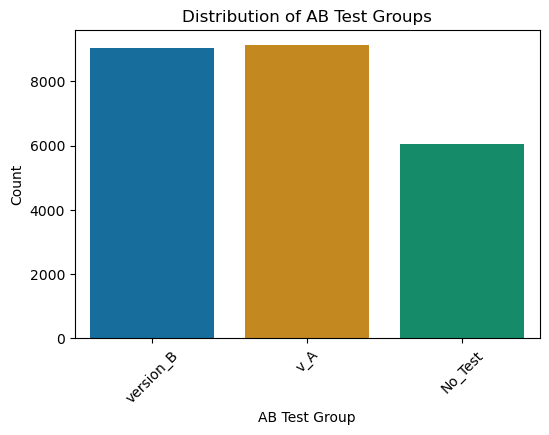

In [71]:
#Univariate the datasets

import matplotlib.pyplot as plt
import seaborn as sns

# Metrics csv document
plt.figure(figsize=(6,4))
sns.countplot(x=df_metrics_csv_cleaned["ABtest"], palette="colorblind")
plt.title("Distribution of AB Test Groups")
plt.xlabel("AB Test Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

This is an absolutely meaningless and disgusting diagram. I will categorize the referral first.

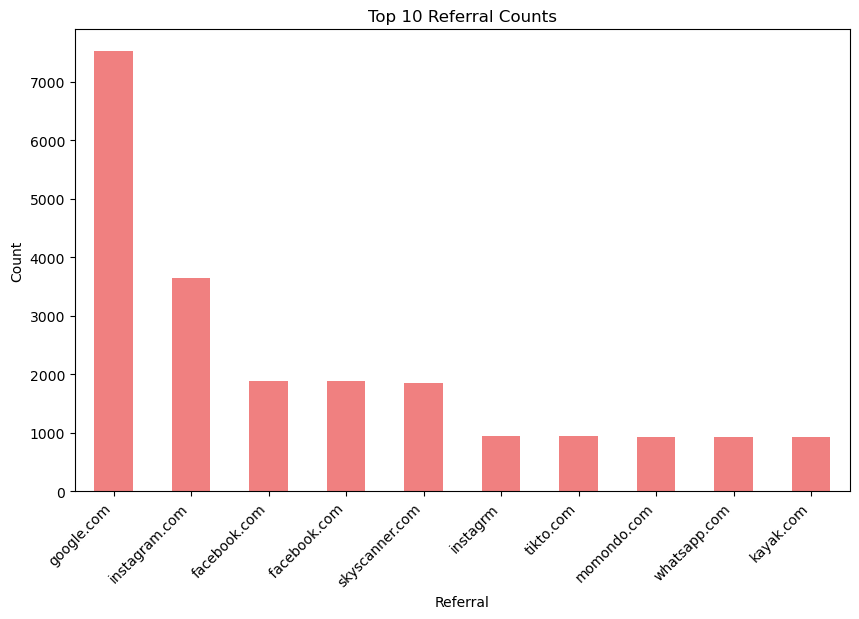

In [72]:
# top 10 referrals
top_referrals = df_metrics_csv_cleaned['referral'].value_counts().head(10)


plt.figure(figsize=(10,6))
top_referrals.plot(kind='bar', color="lightcoral")
plt.title("Top 10 Referral Counts")
plt.xlabel("Referral")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  
plt.show()

The most popular referral is google, following by instagram, facebook and skyscanner. 

I will use boxplot below, since it categorizes the data. 

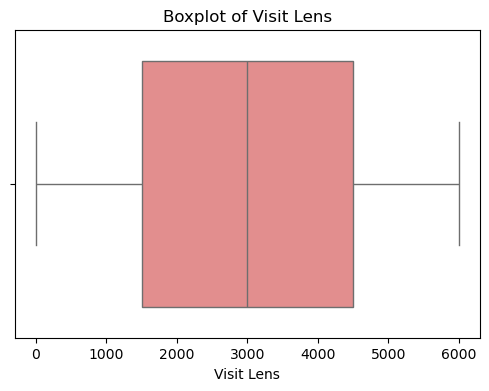

In [44]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_metrics_csv_cleaned["visit_len"], color="lightcoral")
plt.title("Boxplot of Visit Lens")
plt.xlabel("Visit Lens")
plt.show()

The visit lens of the users are between about 1500 to 4500.

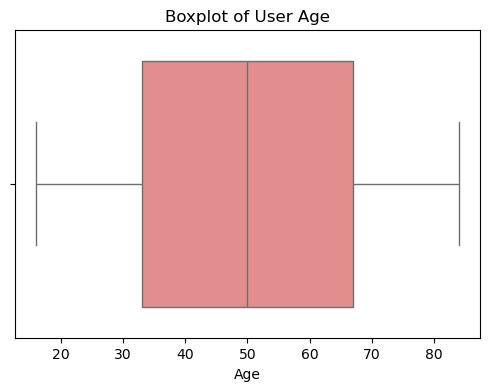

In [46]:
#Metrics_users csv document
plt.figure(figsize=(6,4))
sns.boxplot(x=df_metrics_users_csv_cleaned["user_age"], color="lightcoral")
plt.title("Boxplot of User Age")
plt.xlabel("Age")
plt.show()

The users on this forum are between 33 years old to about 67 years old. 

There are too many different countries in the world, so it is hard to use any kinds of diagrams to include all of them. The problem is not on the type of the diagram, but more on what kinds of data should I select.

I decided to only present 10 most frequent countries, like I did in referral graphic.

C:\Users\Xinxu\AppData\Local\Temp\ipykernel_3616\595848553.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_countries.index, y=top_n_countries.values, palette="Set2")


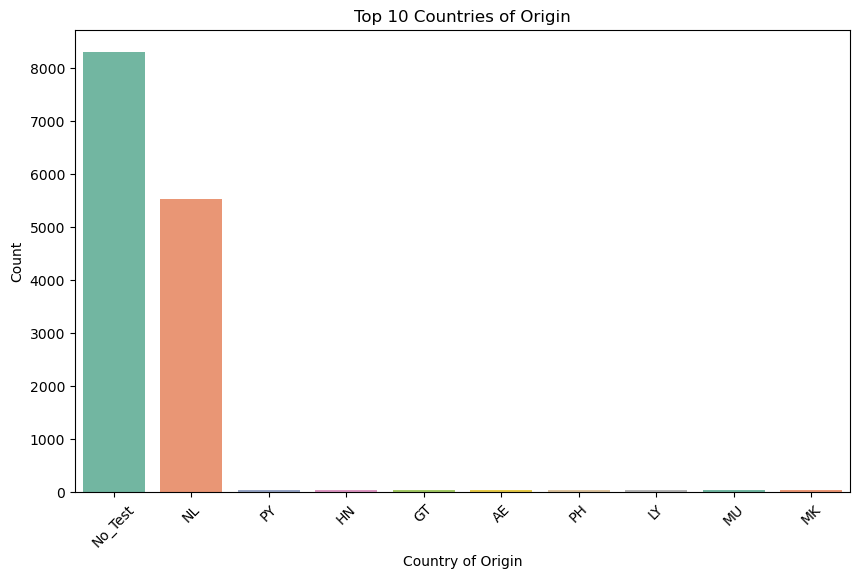

In [47]:
# First, choose the top 10 countries. That's what nlargest() made for.
top_n_countries = df_metrics_users_csv_cleaned["user_country_of_origin"].value_counts().nlargest(10)


plt.figure(figsize=(10,6))
sns.barplot(x=top_n_countries.index, y=top_n_countries.values, palette="Set2")
plt.title("Top 10 Countries of Origin")
plt.xlabel("Country of Origin")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

According to ISO 3166-1 alpha-2, NL refers to the Netherlands. PY refers to Paraguay. HIN is unrecognizable. GT refers to Guatemala. AE refers to United Arab Emirates. PH refers to Philippines. LY refers to Libya. MU refers to Mauritius. MK refers to North Macedonia. 

The country of origin covers Europe, Latin America, Middle-East and Asia and Africa. 

C:\Users\Xinxu\AppData\Local\Temp\ipykernel_3616\2284052142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_metrics_users_csv_cleaned["user_totalUniquePageviews"], palette="Set2")


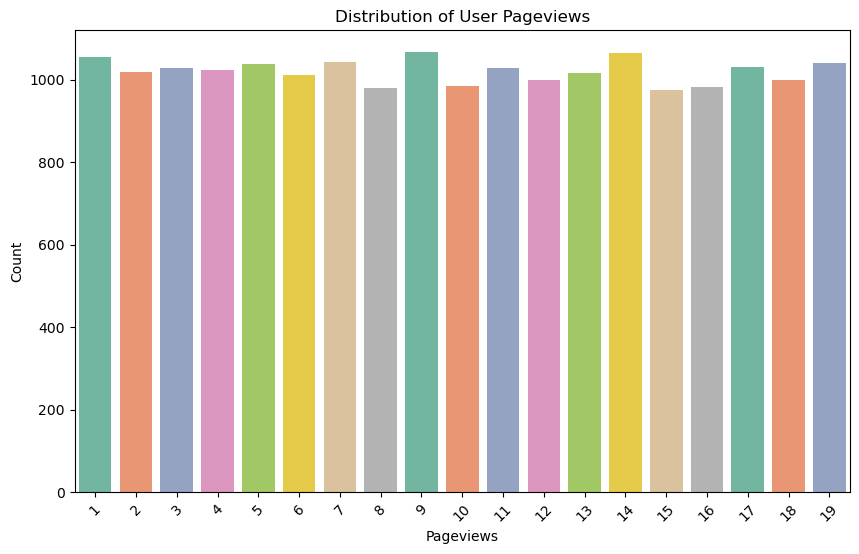

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x=df_metrics_users_csv_cleaned["user_totalUniquePageviews"], palette="Set2")
plt.title("Distribution of User Pageviews")
plt.xlabel("Pageviews")
plt.ylabel("Count")
plt.xticks(rotation=45)  # rotate x-axis labels.
plt.show()

Visualization of key bivariate relationships:

For more details about the key variables, please refer to my last section "Data Cleaning".
In this part, my main task is Exploratory Data Analysis (EDA), aiming to find the relations between two elemensts. Therefore, there is no need to split the data.

I used Chi-Square test to analyze the relationship between ABtest variables and referral, since both of them are not numerical values, but categoricalv values. Firstly, scipy.stats was imported to ensure the following analysis can be based on it. After that, I calculated the crosstab of ABtest and referral and store them in contigency_table. After data storage, I ran Chi-square test and stats (scipy.stats) to analyze their relationship. 

After the analysis, I print out the Chi2 statistics, p-value, degrees of freedom and expected frequencies. To make the readers not familiarized with statistics understand the outcome, I added two lines in the end to explain what it means when p<0.05 and if it is not the case (when p>=0.05). 

The following codes all follow this logic.

In [17]:
#The relationship between AB test and everything
#ABtest is categorical variable. 
#The relationship between AB test and referral.
#This is the bivariate visualization of two categorical variables.

import scipy.stats as stats

# calculate the crosstab of ABtest and referral
contingency_table = pd.crosstab(df_metrics_csv_cleaned['ABtest'], df_metrics_csv_cleaned['referral'])

# since this is the interplay of two categorical values, we use Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# outcome
print(f'Chi2 statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: \n{expected}')

# p value
if p < 0.05:
    print("There is a significant relationship between ABtest and referral.")
else:
    print("There is no significant relationship between ABtest and referral.")

Chi2 statistic: 3390.8168019636682
p-value: 0.4158619399883651
Degrees of freedom: 3374
Expected frequencies: 
[[ 468.79967797  472.29259733 1875.94719458 ...  235.02357458
   227.03975889  230.03368977]
 [ 709.36691301  714.65224392 2838.60022295 ...  355.6272656
   343.54650923  348.07679287]
 [ 700.83340903  706.05515875 2804.45258247 ...  351.34915982
   339.41373189  343.88951736]]
There is no significant relationship between ABtest and referral.


In [19]:
# calculate the crosstab of ABtest and visit_len in df_metrics_csv_cleaned doc
contingency_table = pd.crosstab(df_metrics_csv_cleaned['ABtest'], df_metrics_csv_cleaned['visit_len'])

# since this is the interplay of two categorical values, we use Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# outcome
print(f'Chi2 statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: \n{expected}')

# p value
if p < 0.05:
    print("There is a significant relationship between ABtest and visit_len.")
else:
    print("There is no significant relationship between ABtest and visit_len.")

Chi2 statistic: 11630.589044328393
p-value: 0.8282031596827244
Degrees of freedom: 11776
Expected frequencies: 
[[0.99801817 0.24950454 1.74653179 ... 0.74851363 1.49702725 1.99603633]
 [1.5101569  0.37753922 2.64277457 ... 1.13261767 2.26523534 3.02031379]
 [1.49182494 0.37295623 2.61069364 ... 1.1188687  2.23773741 2.98364988]]
There is no significant relationship between ABtest and visit_len.


In [20]:
# calculate the crosstab of ABtest and user_age in df_metrics_users_csv_cleaned doc
contingency_table = pd.crosstab(df_metrics_csv_cleaned['ABtest'], df_metrics_users_csv_cleaned['user_age'])

# since this is the interplay of two categorical values, we use Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# outcome
print(f'Chi2 statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: \n{expected}')

# p value
if p < 0.05:
    print("There is a significant relationship between ABtest and user_age.")
else:
    print("There is no significant relationship between ABtest and user_age.")

Chi2 statistic: 136.37345326587283
p-value: 0.47486301610757126
Degrees of freedom: 136
Expected frequencies: 
[[ 70.27537803  69.52510709  69.7751974   65.27357176  67.02420395
   74.27682304  70.02528771  70.02528771  65.77375239  71.77591991
   69.27501677  69.02492646  68.52474583  71.02564897  72.77628116
   76.27754554  62.02239769  73.02637147  73.27646178  72.52619084
   75.5272746   68.27465552  70.52546834  69.52510709  73.02637147
   72.02601022  77.02781648  73.02637147  68.52474583  73.27646178
   74.27682304  74.77700366  72.02601022  70.52546834  72.02601022
   66.0238427   76.02745523  67.27429427  77.2779068   73.5265521
   74.77700366  68.27465552  76.77772617  75.02709398  63.27284925
   67.02420395  65.77375239  72.52619084  73.02637147  63.02275894
   73.77664241  73.27646178  72.27610053  70.27537803  68.77483615
   69.52510709  66.0238427   68.27465552  66.52402333  78.77844868
   61.52221706  66.52402333  64.27321051  65.27357176  61.02203643
   70.27537803  68.

In [32]:
# calculate the crosstab of ABtest and user_country_of_origin in df_metrics_users_csv_cleaned doc
contingency_table = pd.crosstab(df_metrics_csv_cleaned['ABtest'], df_metrics_users_csv_cleaned['user_country_of_origin'])

# since this is the interplay of two categorical values, we use Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# outcome
print(f'Chi2 statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: \n{expected}')

# p value
if p < 0.05:
    print("There is a significant relationship between ABtest and user_country_of_origin.")
else:
    print("There is no significant relationship between ABtest and user_country_of_origin.")

Chi2 statistic: 353.51459631729426
p-value: 0.8809035022982126
Degrees of freedom: 386
Expected frequencies: 
[[   4.23272826   10.45732864    6.47358439    4.9796803     9.46139258
     8.2164725     4.9796803     8.46545652    8.2164725     7.22053644
     5.97561636    5.22866432    6.97155242    5.97561636    5.72663235
     5.97561636    4.73069629    9.21240856    7.96748849    6.97155242
     5.72663235    7.46952046    8.2164725     9.46139258    7.71850447
     5.22866432    6.47358439    8.2164725     6.22460038    8.2164725
     5.72663235    6.47358439    7.22053644    7.22053644    6.47358439
     9.21240856    7.22053644    8.2164725     8.2164725     3.98374424
     8.46545652    8.96342455    9.21240856    5.72663235    5.97561636
     5.97561636    6.47358439    7.22053644    7.96748849    9.95936061
     8.2164725     5.22866432    6.97155242    8.2164725     7.46952046
     5.47764833    7.71850447    7.96748849    8.71444053    6.47358439
     8.71444053    8.963424

In [21]:
# calculate the crosstab of ABtest and user_totalUniquePageviews in df_metrics_users_csv_cleaned doc
contingency_table = pd.crosstab(df_metrics_csv_cleaned['ABtest'], df_metrics_users_csv_cleaned['user_totalUniquePageviews'])

# since this is the interplay of two categorical values, we use Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# outcome
print(f'Chi2 statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: \n{expected}')

# p value
if p < 0.05:
    print("There is a significant relationship between ABtest and user_totalUniquePageviews.")
else:
    print("There is no significant relationship between ABtest and user_totalUniquePageviews.")

Chi2 statistic: 36.54833992291638
p-value: 0.44319708412606224
Degrees of freedom: 36
Expected frequencies: 
[[263.84528049 254.5919389  257.09284203 256.09248078 259.59374516
  252.59121639 260.59410641 244.83841668 266.59627393 246.08886825
  257.34293234 250.09031326 253.84166796 266.34618362 243.58796511
  245.58868762 257.59302266 249.59013263 260.09392579]
 [398.87134231 384.88248955 388.66326057 387.15095216 392.44403158
  381.85787274 393.95633999 370.13748258 403.03019043 372.02786809
  389.04133767 378.07710172 383.74825824 402.65211333 368.24709707
  371.27171389 389.41941477 377.32094752 393.20018579]
 [392.2833772  378.52557155 382.2438974  380.75656706 385.96222325
  375.55091087 387.44955359 364.02410074 396.37353564 365.88326366
  382.61572999 371.83258502 377.4100738  396.00170305 362.16493781
  365.13959849 382.98756257 371.08891985 386.70588842]]
There is no significant relationship between ABtest and user_totalUniquePageviews.


Unfortunately, everything is unrelated to ABtest. But I want to check the relations between other variables. 

In [22]:
# calculate the crosstab of user_age and user_totalUniquePageviews in df_metrics_users_csv_cleaned doc
contingency_table = pd.crosstab(df_metrics_users_csv_cleaned['user_age'], df_metrics_users_csv_cleaned['user_totalUniquePageviews'])

# since this is the interplay of two categorical values, we use Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# outcome
print(f'Chi2 statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: \n{expected}')

# p value
if p < 0.05:
    print("There is a significant relationship between user_age and user_totalUniquePageviews.")
else:
    print("There is no significant relationship between user_age and user_totalUniquePageviews.")

Chi2 statistic: 1175.0974154680143
p-value: 0.8385077350912173
Degrees of freedom: 1224
Expected frequencies: 
[[15.29932394 14.76275997 14.90777726 ... 14.93678072 14.4727254
  15.08179801]
 [15.13598596 14.60515044 14.7486195  ... 14.77731331 14.31821231
  14.92078237]
 [15.19043196 14.65768695 14.80167209 ... 14.83046911 14.36971667
  14.97445425]
 ...
 [14.97264798 14.4475409  14.58946173 ... 14.6178459  14.16369923
  14.75976673]
 [13.55705218 13.08159158 13.21009444 ... 13.23579501 12.82458585
  13.36429788]
 [15.89822986 15.34066161 15.49135573 ... 15.52149456 15.03927337
  15.67218868]]
There is no significant relationship between user_age and user_totalUniquePageviews.


In [35]:
# calculate the crosstab of user_country_of_origin and user_totalUniquePageviews in df_metrics_users_csv_cleaned doc
contingency_table = pd.crosstab(df_metrics_users_csv_cleaned['user_country_of_origin'], df_metrics_users_csv_cleaned['user_totalUniquePageviews'])

# since this is the interplay of two categorical values, we use Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# outcome
print(f'Chi2 statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: \n{expected}')

# p value
if p < 0.05:
    print("There is a significant relationship between user_country_of_origin and user_totalUniquePageviews.")
else:
    print("There is no significant relationship between user_country_of_origin and user_totalUniquePageviews.")

Chi2 statistic: 3489.6173863387894
p-value: 0.42266683374987235
Degrees of freedom: 3474
Expected frequencies: 
[[0.93190644 0.91194798 0.91501851 ... 0.90734218 0.86281947 0.89659532]
 [2.30235708 2.25304795 2.26063397 ... 2.24166892 2.13167163 2.21511785]
 [1.42526867 1.39474397 1.39944008 ... 1.38769981 1.31960625 1.37126343]
 ...
 [1.53490472 1.50203197 1.50708932 ... 1.49444595 1.42111442 1.47674524]
 [1.09636052 1.07287998 1.07649237 ... 1.06746139 1.01508173 1.05481803]
 [1.37045065 1.34109997 1.34561546 ... 1.33432674 1.26885216 1.31852253]]
There is no significant relationship between user_country_of_origin and user_totalUniquePageviews.


In [23]:
# calculate the crosstab of user_country_of_origin and user_age in df_metrics_users_csv_cleaned doc
contingency_table = pd.crosstab(df_metrics_users_csv_cleaned['user_country_of_origin'], df_metrics_users_csv_cleaned['user_age'])

# since this is the interplay of two categorical values, we use Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# outcome
print(f'Chi2 statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: \n{expected}')

# p value
if p < 0.05:
    print("There is a significant relationship between user_country_of_origin and user_age.")
else:
    print("There is no significant relationship between user_country_of_origin and user_age.")

Chi2 statistic: 13098.140384401853
p-value: 0.5618275897206525
Degrees of freedom: 13124
Expected frequencies: 
[[0.24410729 0.22875463 0.25485415 ... 0.25178362 0.22261356 0.25945995]
 [0.60308859 0.56515849 0.62963966 ... 0.62205364 0.54998645 0.64101869]
 [0.37334056 0.34986002 0.38977693 ... 0.38508083 0.3404678  0.3968211 ]
 ...
 [0.40205906 0.37677233 0.41975978 ... 0.41470243 0.36665764 0.4273458 ]
 [0.28718504 0.26912309 0.29982841 ... 0.29621602 0.26189831 0.305247  ]
 [0.35898131 0.33640387 0.37478551 ... 0.37027003 0.32737289 0.38155875]]
There is no significant relationship between user_country_of_origin and user_age.


In [24]:
# calculate the crosstab of referral and visit_len in df_metrics_csv_cleaned doc
contingency_table = pd.crosstab(df_metrics_csv_cleaned['referral'], df_metrics_csv_cleaned['visit_len'])

# since this is the interplay of two categorical values, we use Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# outcome
print(f'Chi2 statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: \n{expected}')

# p value
if p < 0.05:
    print("There is a significant relationship between referral and visit_len.")
else:
    print("There is no significant relationship between referral and visit_len.")

Chi2 statistic: 9737994.300565287
p-value: 1.0
Degrees of freedom: 9933056
Expected frequencies: 
[[0.31032205 0.07758051 0.54306358 ... 0.23274154 0.46548307 0.6206441 ]
 [0.31263419 0.07815855 0.54710983 ... 0.23447564 0.46895128 0.62526837]
 [1.24178365 0.31044591 2.17312139 ... 0.93133774 1.86267547 2.4835673 ]
 ...
 [0.15557391 0.03889348 0.27225434 ... 0.11668043 0.23336086 0.31114781]
 [0.15028902 0.03757225 0.26300578 ... 0.11271676 0.22543353 0.30057803]
 [0.15227085 0.03806771 0.26647399 ... 0.11420314 0.22840628 0.3045417 ]]
There is no significant relationship between referral and visit_len.


There is no significant between any two variables in the two datasets.

Checking the data for biases and unbalance (e.g., unequal distributed variables, missing cases):

Bias:

In [25]:
#I want to check whether there is selection bias in ABtest:
df_metrics_csv_cleaned['ABtest'] = np.random.choice(['A', 'B'], size=len(df_metrics_csv_cleaned))

# check whether A/B is equally distributed
print(df_metrics_csv_cleaned['ABtest'].value_counts())

ABtest
A    12128
B    12093
Name: count, dtype: int64


The distribution of the two groups are equal. Therefore, it is not very possible that there would be self-selection bias.

Balance:

In [26]:
#Check ABtest
df_metrics_csv_cleaned['ABtest'].value_counts(normalize=True)

ABtest
A    0.500723
B    0.499277
Name: proportion, dtype: float64

If we only focus on Atest group and Btest group, then it is distributed equally. 

In [27]:
proportions = np.array([0.3775, 0.3730, 0.2495])
std_dev = np.std(proportions)
print(f"standard deviation of ABtest: {std_dev:.4f}")

standard deviation of ABtest: 0.0593


But if we take Non_test (control group) into account as well, then the distrbution is not equal. In this sense, there could be self-selection bias.

The same logic can be applied to other variables. Countries of origin and users' ages will be tested.

In [28]:
#Check users_age
df_metrics_users_csv_cleaned['user_age'].value_counts(normalize=True)

user_age
75    0.016256
54    0.015947
42    0.015895
58    0.015844
31    0.015740
        ...   
65    0.013005
83    0.012850
32    0.012799
76    0.012695
80    0.012592
Name: proportion, Length: 69, dtype: float64

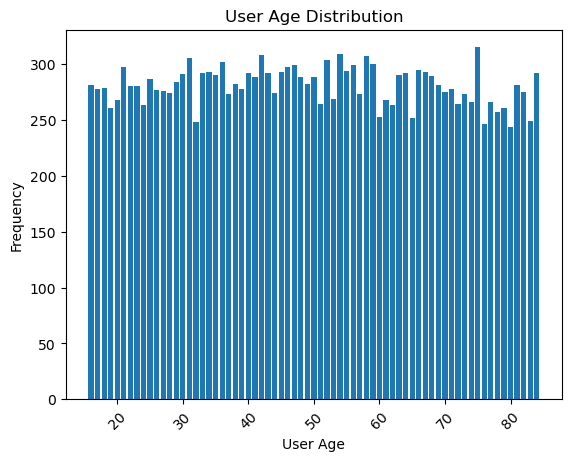

In [57]:
import matplotlib.pyplot as plt

# extract the user_age from the dataset
user_age = df_metrics_users_csv_cleaned['user_age']

# calculate the frequency of the 
user_age_counts = user_age.value_counts()

# visualize
plt.bar(user_age_counts.index, user_age_counts.values)
plt.xlabel("User Age")
plt.ylabel("Frequency")
plt.title("User Age Distribution")
plt.xticks(rotation=45)  # there are too many different ages so I rotated the X
plt.show()

According to the results, the age distribution is equal.

In [29]:
#Check user
df_metrics_users_csv_cleaned['user_country_of_origin'].value_counts(normalize=True)

user_country_of_origin
NL    0.499323
PY    0.003974
HN    0.003883
GT    0.003883
AE    0.003793
        ...   
MC    0.001535
AD    0.001535
TJ    0.001445
CU    0.001445
MW    0.001355
Name: proportion, Length: 194, dtype: float64

It is obvious that the data is distributed unequally. Most countries are the Netherlands. 

Report:

Univariate:
The distribution of AB test groups is almost even. There are about 8500 B test group choices and 8600 A test group choices. However, what is worth noticing is that if we take control group (No_Test) into account, the distribution is not even enough.The visit_lens are generally between 1500 to 4500. Users' ages are averagely between 35 to 67 or 68 years old, which is quite shocking since old people are considered not active on social media platforms or the Internet generally. According to ISO 3166-1 alpha-2, NL refers to the Netherlands. PY refers to Paraguay. HIN is unrecognizable. GT refers to Guatemala. AE refers to United Arab Emirates. PH refers to Philippines. LY refers to Libya. MU refers to Mauritius. MK refers to North Macedonia. The country of origin covers Europe, Latin America, Middle-East and Asia and Africa. The numbers of the pageviews of the users are between 1 to 19, and the distribution is considered equal. 


Bivariate:
Overall, the bivariate test does not approve the hypothesis. Also, there is no significant relation between any two variables. 

Bias&Distribution:
I tested the ABtest groups on self-selection bias. The result of the test shows that there is no self-selection bias. The distribution between A test groups and B test groups is equal, yet if No_Test groups are taken into consideration, it is not equal, with a standard deviation at 0.0593. In order to gauge the distribution extent of the users' ages, I ran a bar plot. The result shows that the distribution of the users is equal. What is also distributed equally is the countries of origin. 

Potential risks:
The number of the users belonging to the No_Test groups is too high, which already sways the standard deviation and may influence the outcome of the research. The major country of origin is the Netherlands, which may induce nationality bias and overshadows or overrepresent the opinions of the users from other countries or continent. It is also quite surprising that there are almost no people under 30 years old in the dataset. Thus, the opinions of the users presented are mainly from middle-aged people and may influence the outcome. 

Word Count: 362

## Modeling and Hypothesis Testing

After understanding and preparing the data, you are ready to do the modeling. It is important to explain to the reader:
* Explaining which models will be used, and why
* If appropriate, explaining which strategy you are using to fine tune or improve the model
* Discussion about the model evaluation (i.e., why you believe the model is a good model) and, if appropriate, comparison between different models
* After the appropriate model is identified, then the hypothesis can be tested. You can then report the result of the tests being used to test the hypothesis (as discussed in the criteria for the assignment), explaining to the reader how the test is being made and what the results of the testing mean for the hypothesis at hand. 
* Visualizations (as appropriate) are helpful to explain to the reader what has been found.
* Usage of the model to make predictions (e.g., key audience segments)
* Reviewing the model to indicate which features (variables) are responsible for the predictions (related to Explainable AI discussions)

**IMPORTANT:**
* We consider as different models both when different features/variables are being tested (to achieve the same objective), or when different algorithms are being tested (with the same features/IVs)
* It is important to explain to the reader what the model contains/is, and also how it is being evaluated. When the evaluation is done, it is also important to discuss what the result means in the current context
* As the focus of this course is on predictive analytics, it is expected that predictions are made (using scikit-learn) and discussed after a hypothesis is tested. This means that when ANOVAs or T-Tests are used (as statistical testing), and equivalent OLS/Linear Regression Model (in scikit-learn) needs to be used to make predictions. All tests need to be done in Python, using statsmodels and/or scikit-learn.

____________________________________________________________________________________________________________________________________________________________________
Unfortunately, according to the bivariate test above, none of the variables are related. Therefore, we need to rethink the model we applied to do the modeling. In this part, I would like to use a machine learning model to predict what kinds of users (with some specific ages, nationalities or referral) may be more likely to enter A group or B group. The machine learning model is random forest.

_______________________________________________________________________________________________________________________________________________________________________________
In the following codes, I test the three hypotheses one by one. The first one is to check the relationship between ABtest data and visit lens. 

Firstly, I imported scipy.stats as stats and numpy as np again. After that, I rename the data in ABtest as "A" and "B" and retrieve them together with visit_len out of their datasets. 

To test the hypothesis, firstly I need to check whether the data is distributed normally. To achieve this goal, I ran Shapiro-Wilk normal distribution test. I printed out the outcome of this test. They distributed almost normally, which proves their qualification of continuing tests. Notice that I used dropna() first to get rid of the missing values.

In the testing part, I followed the statistical logic. If the p values of A and B are both > 0.05, it is qualified for an independent T test. If it is not the case, we should run a Mann-Whitney U test to check the unnormal distribution). No matter whick test method is adopted, I will print out the method.

After running the codes, I printed the outcome out and gave the explanation like I did above. 

In [73]:
#I will test the hypothesis first

import scipy.stats as stats
import numpy as np

#retreive the visit_len data from A and B test groups
visit_len_A = df_metrics_csv_cleaned[df_metrics_csv_cleaned['ABtest'] == 'A']['visit_len']
visit_len_B = df_metrics_csv_cleaned[df_metrics_csv_cleaned['ABtest'] == 'B']['visit_len']

# check whether they are distributed normally
stat_A, p_A = stats.shapiro(visit_len_A.dropna())  # Shapiro-Wilk normal distribution test
stat_B, p_B = stats.shapiro(visit_len_B.dropna())

print(f"Shapiro-Wilk test p-value for A group: {p_A}")
print(f"Shapiro-Wilk test p-value for B group: {p_B}")

# running statistical codes
if p_A > 0.05 and p_B > 0.05:  # p > 0.05 means the data is close to normal distribution
    # independent T test
    t_stat, p_value = stats.ttest_ind(visit_len_A.dropna(), visit_len_B.dropna(), equal_var=False)
    test_type = "t-test"
else:
    # Mann-Whitney U test (to test unnormal distribution)
    u_stat, p_value = stats.mannwhitneyu(visit_len_A.dropna(), visit_len_B.dropna(), alternative='greater')
    test_type = "Mann-Whitney U test"

print(f"Statistical Test Used: {test_type}")
print(f"p-value: {p_value}")

# explain the outcome
alpha = 0.05  # set the significance level
if p_value < alpha:
    print("Result: There is a statistically significant difference. A group stays longer than B group.")
else:
    print("Result: There is no significant difference in visit length between A and B groups.")


Shapiro-Wilk test p-value for A group: nan
Shapiro-Wilk test p-value for B group: nan
Statistical Test Used: Mann-Whitney U test
p-value: nan
Result: There is no significant difference in visit length between A and B groups.


C:\Users\Xinxu\AppData\Local\Temp\ipykernel_8572\122340100.py:11: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat_A, p_A = stats.shapiro(visit_len_A.dropna())  # Shapiro-Wilk normal distribution test
C:\Users\Xinxu\AppData\Local\Temp\ipykernel_8572\122340100.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat_B, p_B = stats.shapiro(visit_len_B.dropna())
C:\Users\Xinxu\AppData\Local\Temp\ipykernel_8572\122340100.py:24: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  u_stat, p_value = stats.mannwhitneyu(visit_len_A.dropna(), visit_len_B.dropna(), alternative='greater')


We can see that the statistcial test used was Mann-Whitney U test instead of independent T tes. Also, there is no difference in visit length between A and B groups. This means that users in this subreddit do not show an obvious preference for emotiona-driven communication plan, which rejects H1.

In [74]:
print(df_metrics_users_csv_cleaned.columns)

Index(['user_age', 'user_country_of_origin', 'user_totalUniquePageviews'], dtype='object')


Since the two datasets do not have shared columns, it is impossible to merge two datasets together. In this case, in order to continue my research, I will assume the users are the same users and cut out the extra lines. In the first line, I calculated the minimum shared length of both datasets by using min(len()). After knowing the exact number (which is expressed as min_length), I used .iloc[:min_length] to cut the rows, so that they have the same lines. In the end, since there is no shared columns, it is impossible to merge them, so I will add the ABtext column in df_metrics_csv_cleaned to df_metrics_users_csv_cleaned to further continue the analysis.

The rest of the logic is totally the same as the codes I wrote before. 

In [75]:
# to gain the minimum length of two columns
min_length = min(len(df_metrics_csv_cleaned), len(df_metrics_users_csv_cleaned))

# to cut out two datasets and make them equally long
df_metrics_csv_cleaned = df_metrics_csv_cleaned.iloc[:min_length].copy()
df_metrics_users_csv_cleaned = df_metrics_users_csv_cleaned.iloc[:min_length].copy()

# add AB test column
df_metrics_users_csv_cleaned['ABtest'] = df_metrics_csv_cleaned['ABtest'].values

In [76]:
import scipy.stats as stats

# user_age to extract the user_age in A and B group
user_age_A = df_metrics_users_csv_cleaned[df_metrics_users_csv_cleaned['ABtest'] == 'A']['user_age']
user_age_B = df_metrics_users_csv_cleaned[df_metrics_users_csv_cleaned['ABtest'] == 'B']['user_age']

# take out the missing values
user_age_A = user_age_A.dropna()
user_age_B = user_age_B.dropna()

# check whether it's distributed normally
stat_A, p_A = stats.shapiro(user_age_A)  
stat_B, p_B = stats.shapiro(user_age_B)

print(f"Shapiro-Wilk test p-value for A group: {p_A}")
print(f"Shapiro-Wilk test p-value for B group: {p_B}")

# select an appropriate statistical approach
if p_A > 0.05 and p_B > 0.05:  
    # independent t test
    t_stat, p_value = stats.ttest_ind(user_age_A, user_age_B, equal_var=False)
    test_type = "t-test"
else:
    # Mann-Whitney U test
    u_stat, p_value = stats.mannwhitneyu(user_age_A, user_age_B, alternative='two-sided')
    test_type = "Mann-Whitney U test"

# print the statistical approach
print(f"Statistical Test Used: {test_type}")
print(f"p-value: {p_value}")

# explain
alpha = 0.05
if p_value < alpha:
    print("Result: There is a statistically significant difference in user_age between A and B groups.")
else:
    print("Result: There is no significant difference in user_age between A and B groups.")

Shapiro-Wilk test p-value for A group: nan
Shapiro-Wilk test p-value for B group: nan
Statistical Test Used: Mann-Whitney U test
p-value: nan
Result: There is no significant difference in user_age between A and B groups.


C:\Users\Xinxu\AppData\Local\Temp\ipykernel_8572\2267966703.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat_A, p_A = stats.shapiro(user_age_A)
C:\Users\Xinxu\AppData\Local\Temp\ipykernel_8572\2267966703.py:13: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat_B, p_B = stats.shapiro(user_age_B)
C:\Users\Xinxu\AppData\Local\Temp\ipykernel_8572\2267966703.py:25: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  u_stat, p_value = stats.mannwhitneyu(user_age_A, user_age_B, alternative='two-sided')


In [77]:
import scipy.stats as stats

# user_age to extract the user_age in A and B group
user_totalUniquePageViews_A = df_metrics_users_csv_cleaned[df_metrics_users_csv_cleaned['ABtest'] == 'A']['user_totalUniquePageviews']
user_totalUniquePageViews_B = df_metrics_users_csv_cleaned[df_metrics_users_csv_cleaned['ABtest'] == 'B']['user_totalUniquePageviews']


# take out the missing values
user_age_A = user_age_A.dropna()
user_age_B = user_age_B.dropna()

# check whether it's distributed normally
stat_A, p_A = stats.shapiro(user_age_A)  
stat_B, p_B = stats.shapiro(user_age_B)

print(f"Shapiro-Wilk test p-value for A group: {p_A}")
print(f"Shapiro-Wilk test p-value for B group: {p_B}")

# select an appropriate statistical approach
if p_A > 0.05 and p_B > 0.05:  
    # independent t test
    t_stat, p_value = stats.ttest_ind(user_age_A, user_age_B, equal_var=False)
    test_type = "t-test"
else:
    # Mann-Whitney U test
    u_stat, p_value = stats.mannwhitneyu(user_age_A, user_age_B, alternative='two-sided')
    test_type = "Mann-Whitney U test"

# print the statistical approach
print(f"Statistical Test Used: {test_type}")
print(f"p-value: {p_value}")

# explain
alpha = 0.05
if p_value < alpha:
    print("Result: There is a statistically significant difference in user_age between A and B groups.")
else:
    print("Result: There is no significant difference in user_age between A and B groups.")

Shapiro-Wilk test p-value for A group: nan
Shapiro-Wilk test p-value for B group: nan
Statistical Test Used: Mann-Whitney U test
p-value: nan
Result: There is no significant difference in user_age between A and B groups.


C:\Users\Xinxu\AppData\Local\Temp\ipykernel_8572\2087954168.py:13: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat_A, p_A = stats.shapiro(user_age_A)
C:\Users\Xinxu\AppData\Local\Temp\ipykernel_8572\2087954168.py:14: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat_B, p_B = stats.shapiro(user_age_B)
C:\Users\Xinxu\AppData\Local\Temp\ipykernel_8572\2087954168.py:26: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  u_stat, p_value = stats.mannwhitneyu(user_age_A, user_age_B, alternative='two-sided')


There is no significant difference between either of the dependent variables and ABTest groups. Three hypothesis are all rejected. 

*Below is the model testing outcome*

Firstly, I used "NaN" to replace "No_Test" in case of the occurence of errors. This is because "No_Test" is not a part of AB test, as it is the control group. If we run the control group with the AB test, it may induce errors. After that, I used map() to reflect A as "0" and B as "1" in order to more conveniently process the following steps. In this process, the outcome of the reflection process was stored as "y". In order to keep pace with "0" and "1", I named the NaN value of y as "-1". 

In order to check whether I have done it correctly, I printed the data out. isnull().sum() is for checking whether there is still existence of missing values and whether all No_Test is replaced as -1. y.unique() is to ensure there is only 0, 1 and -1.

However, though the outcome shows there is no missing value, there is only -1 (no test) in the dataset. This is problematic and needs refinement. 

In [78]:
# No_Test to NaN
df_metrics_csv_cleaned['ABtest'] = df_metrics_csv_cleaned['ABtest'].replace('No_Test', np.nan)

# reflect
y = df_metrics_csv_cleaned['ABtest'].map({'A': 0, 'B': 1})

# fill NaN to -1 or other value that can represent control group
y.fillna(-1, inplace=True)

# check the value after reflection
print(y.isnull().sum())  
print(y.unique())

0
[-1.]


In the following steps, I revised my codes to make it better. I firstly again imported numpy as np. After that, I did some data cleaning again in case of any potential errors. I cleaned out the the space and capitalization in the dataset and turn "No_Test" to NaN and did reflection again, to store A nad B to 0 and 1 and stored them as "y" again. After that, I checked whether there is any missing values. I used .isnull().sum() to check the missing values and unique() to check unique values. I used -1 to fill the missing values to represent the control group. After that I checked the outcome. There are 19377 missing values. Also, after refill, all unique values are -1 now, which is still not ideal. This means the problem is not because of the data cleaning, but probably during map. It is probably because there is no proper A and B in df_metrics_csv_cleaned. 

In [79]:
import numpy as np

# 1. clean the space and the capitalization
df_metrics_csv_cleaned['ABtest'] = df_metrics_csv_cleaned['ABtest'].str.strip().str.upper()

# 2. turn "No_Test" to NaN (control group)
df_metrics_csv_cleaned['ABtest'] = df_metrics_csv_cleaned['ABtest'].replace('NO_TEST', np.nan)

# 3. reflect A and B to 0 and 1
y = df_metrics_csv_cleaned['ABtest'].map({'A': 0, 'B': 1})

# 4. check whether there is any missing values
print("Missing values:", y.isnull().sum())  
print("Unique values:", y.unique())  

# 5. use -1 to fill the missing values to represent the control group
y.fillna(-1, inplace=True)

# 6. check the outcome
print("Unique values after filling:", y.unique())  


Missing values: 19377
Unique values: [nan]
Unique values after filling: [-1.]


There are 19377 missing values, which is a lot for my further analysis. Therefore, I checked where was going wrong. 

In [80]:
df_metrics_csv_cleaned['ABtest'] = df_metrics_csv_cleaned['ABtest'].str.strip().str.upper()

# Check whether there is any other extra values
print(df_metrics_csv_cleaned['ABtest'].unique())  # check the only value

['VERSION_B' 'V_A' nan]


As stated in the outcome, the mistake leading to my error before is clear. This is because the map was not successful and there are still VERSISON_B and V_A instead of "B" and "A" in the dataset.

In the following codes, I tried to reflect "V_A" and "VERSION_B" to 0 and 1. The outcome shows that this time, the mapping was successful. 

In [81]:
y = df_metrics_csv_cleaned['ABtest'].map({'V_A': 0, 'VERSION_B': 1})

# Check the missing values and the unique value
print(y.isnull().sum())  # NaN make sure there is no NaN
print(y.unique())  # check the unique value

4846
[ 1.  0. nan]


4846 missing values is still a lot. I need to run the data cleaning again.

Cgeck the unique value again, and I can see there is still "nan" in it.

In [82]:
print(df_metrics_csv_cleaned['ABtest'].unique())  

['VERSION_B' 'V_A' nan]


I remap V_A and VERSION_B again to 0 and 1.

In [83]:
y = df_metrics_csv_cleaned['ABtest'].map({'V_A': 0, 'VERSION_B': 1})

I used dropna to clean the invalid values.

In [84]:
df_metrics_csv_cleaned = df_metrics_csv_cleaned.dropna(subset=['ABtest'])

I remapped again on the basis of NaN values clearance.

In [85]:
y = df_metrics_csv_cleaned['ABtest'].map({'V_A': 0, 'VERSION_B': 1})

I checked whether there is still any missing values. There is no missing values. 

In [86]:
print(y.isnull().sum())  

0


After cleaning and rearranging the data, we can now start model training.

The first step is to use .dropna to ensure X and y have the same number of samples, by dropping the NaN value in the ABtest column. After that, I got rid of the extra lines in df_metrics_users_csv_cleaned dataset by using iloc[] in order to make the lines of both datasets match with each other. After dropping NaN values, we need to re-generate X and y to do the data cleaning process again in case of the errors. The first three processes are the same as the aforementioned process. The reason why I put them down here is to show my logic more clearly. 

After preparation, we split the data into training data and test data. X_train, X_test, y_train and y_test were equalled to the train_test_split(). The test size is 0.2, which means the test group takes 20% of the whole data. The random_state does not have any specific meaning, so 42 is just a random number I chose. It will not influence the outcome.

After all the aforementioned process, random forest was selected to run the test. The n_estomators was 100， which means there are 100 random trees in the random forest model. The random_state was the same as the the split process. After this, I predicted and evaluated the model and printed out the outcome. The accuracy of the model and details were printed out and presented below. 

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Drop rows with NaN in the 'ABtest' column
df_metrics_csv_cleaned = df_metrics_csv_cleaned.dropna(subset=['ABtest'])

# Map 'V_A' to 0 and 'VERSION_B' to 1
y = df_metrics_csv_cleaned['ABtest'].map({'V_A': 0, 'VERSION_B': 1})

# Select features for model (make sure 'feature' contains valid column names)
feature = ['referral', 'visit_len']  # Use your own features here
X = pd.get_dummies(df_metrics_csv_cleaned[feature], drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importances
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
print("\nFeature Importances:\n", feature_importances)


Accuracy: 0.4932920536635707

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50      1479
           1       0.48      0.49      0.49      1428

    accuracy                           0.49      2907
   macro avg       0.49      0.49      0.49      2907
weighted avg       0.49      0.49      0.49      2907


Feature Importances:
 visit_len                              0.905318
referral_facebook.com                  0.001575
referral_google.com                    0.001651
referral_http://adams.com/             0.000081
referral_http://aguirre-cooper.biz/    0.000082
                                         ...   
referral_momondo.com                   0.001311
referral_skyscanner.com                0.001571
referral_tikto.com                     0.001221
referral_tiktok.com                    0.001005
referral_whatsapp.com                  0.001181
Length: 1045, dtype: float64


We can see that the model is not performing well at all. The accuracy is 0.49, lower than 0.50, which means it does not even meet the basic requirements. Also, the F1 scores are respectively 0.50 and 0.49, which are both not very precise. 

The following codes follow the same logic as above.

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Drop rows with NaN in the 'ABtest' column in df_metrics_csv_cleaned
df_metrics_csv_cleaned = df_metrics_csv_cleaned.dropna(subset=['ABtest'])

# Map 'V_A' to 0 and 'VERSION_B' to 1 in ABtest column
y = df_metrics_csv_cleaned['ABtest'].map({'V_A': 0, 'VERSION_B': 1})

# Merge df_metrics_csv_cleaned and df_metrics_users_csv_cleaned on the common index or a key
# Use suffixes to handle the 'ABtest' column conflict
df_combined = df_metrics_csv_cleaned.join(df_metrics_users_csv_cleaned, how='inner', rsuffix='_users')

# Select features for model (use actual column names from df_metrics_users_csv_cleaned)
feature = ['user_country_of_origin', 'user_totalUniquePageviews']  # Adjust to correct columns

# Create X with the selected features and drop the first category to avoid multicollinearity
X = pd.get_dummies(df_combined[feature], drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importances
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
print("\nFeature Importances:\n", feature_importances)


Accuracy: 0.5180598555211559

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.57      0.54      1479
           1       0.51      0.47      0.49      1428

    accuracy                           0.52      2907
   macro avg       0.52      0.52      0.52      2907
weighted avg       0.52      0.52      0.52      2907


Feature Importances:
 user_totalUniquePageviews    0.400902
user_country_of_origin_AE    0.003569
user_country_of_origin_AF    0.003077
user_country_of_origin_AG    0.001757
user_country_of_origin_AL    0.003898
                               ...   
user_country_of_origin_WS    0.002780
user_country_of_origin_YE    0.002889
user_country_of_origin_ZA    0.002456
user_country_of_origin_ZM    0.002103
user_country_of_origin_ZW    0.002955
Length: 195, dtype: float64


We can see that the model is not performing well at all. The accuracy is 0.51, only a little higher than 0.50, which means it does not even meet the basic requirements. Also, the F1 scores are respectively 0.54 and 0.49, which are both not very precise. 

Both model training outcomes are not ideal. There is no need to do cross-validation test.

## Evaluation 

This section provides the answer to the communication challenge, discussing the results (hypothesis testing) in order to answer the general RQ. Creativity in how to summarize the findings (including visualizations) is a plus.

This section also provides a set of implications (i.e., now that we know the answer to the RQ, what does it mean for the organization/process/challenge? what should the organization do?).

The communication challenge is to explore whether an emotion-driven or statistical-driven campaign is more effective in promoting anti-racism in Arsenal's online communities. The research question is, "Can emotion-driven communication influence r/ArsenalFC users’ opinions on racism more than statistical-driven plans?" The hypothesis suggests that emotion-driven plans (B group) will have a greater impact than statistical-driven plans (A group). The three hypotheses are:

H1: Emotion-driven plans will increase users' visit time.  
H2: Emotion-driven plans will increase total unique page views.  
H3: Older users will engage more with emotion-driven plans.

A/B test groups were assigned based on user comments in the subreddit. Data collected included visit_len, referral sources, user age, and country of origin. The main focus was on visit_len to compare how long users stayed on statistical versus emotional content.

Results showed that all hypotheses were rejected. There was no evidence that users stayed longer or viewed more pages with either content type. Younger users also showed no significant interest in either type of anti-racism communication. However, univariate tests revealed that most users came from Google and were from the Netherlands. Most users engaging with anti-racism content were aged 33-67. Page views were distributed evenly, and users spent significant time on both content types, with an average of 3000 seconds (50 minutes) spent on each.

The findings suggest strong user interest in Arsenal's anti-racism content, especially among middle-aged and older users from the Netherlands. Based on these results, Arsenal could consider the following steps:

1. **Target Younger Audiences**: Focus on platforms like Twitter, Instagram, and TikTok to make Gen Z users more engaged and interactive on such topic.
2. **Diversify Content**: Offer both statistical and emotional content, as neither was definitively more engaging, but both attracted significant attention.
3. **Focus on the Netherlands**: Increase localized content targeting Dutch fans, especially given their active participation in anti-racism discussions.
4. **Invest in Google Ads**: Allocate resources to SEO and Google Ads to increase exposure, thus attracting more users to engage in anti-racism discussions.

Word Count: 331

## Limitations and Next Steps

In this section you should discuss all the relevant limitations. This includes the limitations of the analysis and of the data, thus consolidating and extending the discussion already included in the earlier sections (e.g., Data Collection, Data Exploration and Modelling), and what do these limitations mean to the conclusions and to the overall challenge.

In other words, make sure that you are at least covering:
* The dataset(s) itself, including how the data collection may have created limitations
* Limitations associated with the decisions taken during the data understanding & preparation
* Limitations about the model and hypothesis testing (including fit, selection of variables)
* Alternative interpretations to the findings
* You need also to suggest next steps/actions to overcome the most important limitations (as indicated in the assignment criteria).


Dataset Limitations:
 The dataset focuses on users interacting with anti-racism content but excludes those discussing it without direct interaction, like posting a photo or commenting on the content. This exclusion could introduce bias and may not fully represent the opinions of r/ArsenalFC on anti-racism communication.


Decision Limitations:
 To simplify and speed up the process, I removed some columns, which might have affected the model training and ultimately influenced the research outcomes. Additionally, since the two datasets lacked shared columns, I removed extra rows from df_users_metrics_cleaned_csv, which could impact the model’s accuracy.


Model Testing:
 I used get_dummies to process the data, but this could cause issues with numeric variables. Cross-validation wasn’t performed due to the model’s subpar performance. The main limitation was removing rows, and using random_state=42 may have caused an imbalance between the A and B test groups, leading to potential deviations.


Alternative Interpretation:
 The high number of Dutch users doesn't imply Arsenal is more popular in the Netherlands; this could be due to selection bias or researcher preferences. Longer visit times or many page views don’t necessarily indicate more interest, as they might result from confusion over complex content. The lack of young users interacting doesn’t mean disinterest—they may prefer platforms like TikTok or Instagram.


Future Improvements:
 The biggest limitation was cutting extra rows during hypothesis and model testing. To avoid this in the future, I would suggest adding a shared column (e.g., user_id) to merge the datasets effectively.

Word Count: 243

## Ethical and Normative Considerations

This section should discuss the considerations the organization needs to have. Are there ethical or more general normative aspects that need to be taken into account? Drawing directly from the literature discussed in class (and other literature), what should readers of the data analysis be mindful about? Make sure to cite the relevant literature. 

This discussion can relate to the actual dataset/analysis that was done, to the recommendations/implications, and to the action plan suggested in the previous sections.

The Ethical Consideration:  

According to Dignum (2018), methodologies are needed to clarify stakeholder values, enhancing trust in data processes. To achieve transparency, researchers should explain their data and comply with GDPR (European Parliament, 2016). The data collection process must respect lawfulness, fairness, and transparency. As the researcher, I comply with European data protection laws. Purpose limitation is achieved, as the data is solely for research. To protect sensitive data, especially user IDs, I minimized the dataset by deleting unnecessary columns. After research, I will upload all original documents to a locked University of Amsterdam drive, complying with GDPR storage rules.  

Readers should be mindful of several aspects. First, they should assess the reliability of the data source. Bias during selection may influence model performance. Second, they should evaluate representativeness. For example, subreddit users may not fully reflect all Arsenal fans’ opinions on Arsenal’s communication, as most users are over 30, potentially causing generational bias. Finally, biases may arise from data collection methods, such as selecting r/ArsenalFC or specific user types like middle-aged users. These biases not only affect research outcomes but also influence responsibility attribution (Eckhouse et al., 2019).

Word Count: 190

## References

If you use scientific papers, cite them using APA style (and add a reference section at the end). If you are using pieces of code written by someone else, add a comment in the appropriate section and add a link to the source.

1. Dignum, V. (2018). Ethics in artificial intelligence: Introduction to the special issue. Ethics and Information Technology, 20, 1–3.
2. Eckhouse, L., Lum, K., Conti-Cook, C., & Ciccolini, J. (2019). Layers of bias: A unified approach for understanding problems with risk assessment. Criminal Justice and Behavior, 46(2), 185-209.
3. Regulation, P. (2018). General data protection regulation. Intouch, 25, 1-5.
